# Importando bibliotecas

In [12]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# Importando dados

In [13]:
df = pd.read_csv('livros_cb.csv', sep=';')

# Removendo os box

In [14]:
lista = []
for i in df['Livro'].unique():
  if i.split()[0] != 'Box':
    lista.append(i)


In [15]:
selecao = df['Livro'].isin(lista)
df = df[selecao]

In [16]:
df

,Livro,preco,parcelas,valor_parcelas
1,"Verissimo Antológico: Meio Século De Crônicas,...","87,90",1,"87,90"
2,Livro O Dia Do Relâmpago,"47,92",1,"47,92"
3,The Walking Dead: a Queda do Governador - Vol...,"41,42",1,"41,42"
4,The Walking Dead: a Queda do Governador - Par...,"41,42",1,"41,42"
5,A Rainha Vermelha - Vol.1,"34,32",1,"34,32"
...,...,...,...,...
615,Viagem Ao Centro Da Terra,"20,90",1,"20,90"
616,A Volta Ao Mundo Em 80 Dias,"16,90",1,"16,90"
617,Arsène Lupin Contra Herlock Sholmes,"20,90",1,"20,90"
618,"Timestorm: Porque, Do Destino, Não Há Como Esc...","20,90",1,"20,90"


# Selecionando os primeiros 500 resultados

In [17]:
df = df.loc[0:502]
df.shape[0]

500

# Organizando pelo preço

In [19]:
df = df.sort_values(by='preco', ascending=False)  

# Ajustando a coluna Preço

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 136 to 252
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Livro           500 non-null    object
 1   preco           500 non-null    object
 2   parcelas        500 non-null    int64 
 3   valor_parcelas  500 non-null    object
dtypes: int64(1), object(3)
memory usage: 19.5+ KB


In [22]:
df['preco'] = df['preco'].str.replace(',','.')
df['preco'] = df['preco'].astype(float, errors = 'raise')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 136 to 252
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Livro           500 non-null    object 
 1   preco           500 non-null    float64
 2   parcelas        500 non-null    int64  
 3   valor_parcelas  500 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 19.5+ KB


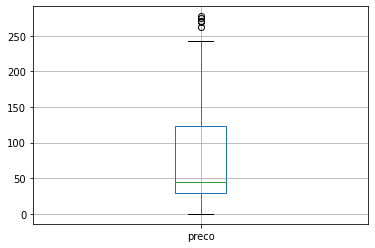

In [25]:
df2 = df.boxplot('preco')

# Tratamento estatístico

In [26]:
df['preco'].describe()

count    500.000000
mean      70.533820
std       63.743931
min        0.000000
25%       30.000000
50%       44.595000
75%      122.897500
max      277.300000
Name: preco, dtype: float64

In [28]:
preco = df['preco']

## Primeiro e terceiro quartis

In [29]:
q1 = preco.quantile(.25)
q3 = preco.quantile(.75)

## Intervalo interquatile

In [30]:
iiq = q3 - q1

## Limites

In [31]:
lim_inf = q1 - 1.5 * iiq
lim_sup = q3 + 1.5 * iiq

## Selecionando os dados do intervalo

In [32]:
selecao = (preco >= lim_inf) & (preco <= lim_sup)

df_new = df[selecao]

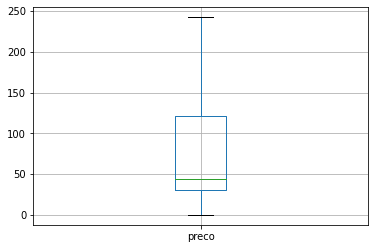

In [33]:
df_new.boxplot(['preco'])

## Histograma

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f931a28cb90>]],
      dtype=object)

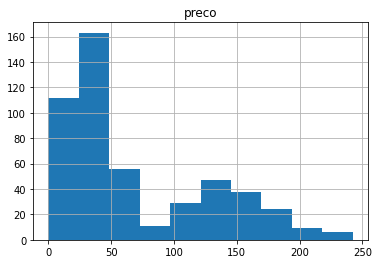

In [35]:
df_new.hist(['preco'])